#  **Content**

*1. DataSet Summaries:*
<br>[*1.1 Employees groupped by Age, only those who still works in the Company (Attrition = No)*](#AgeWorking)
<br>[*1.2 Employees groupped by Age, only those who quited working in the Company (Attrition = Yes)*](#AgeNotWorking)
<br>[*1.3 Percentage of attrited Employees groupped by Age*](#quited100)
<br>[*1.4 Employees Counted by Departments and distributed between Age_groups (Attrition = No)*](#EmployeesDepts)
<br>[*1.5 Total quantity of Employees by Departments (Attrition = No)*](#EmployeesDeptsTotal)
<br>[*1.6 Total quantity of Employees by Departments (Attrition = Yes)*](#EmployeesDeptsTotalQuited)
<br>[*1.7 Employees Counted by Departments and Gender and distributed between Age_groups (Attrition = No)*](#EmployeesDeptsGen)
<br>[*1.8 Employees Counted by Gender and Education and distributed between Age_groups (Attrition = No)*](#EmployeesEdGen)
<br>[*1.9 Monthly Income by Age_groups (Attrition = No)*](#EmployeesSalaryGen)
<br>[*1.10 Median of Monthly Income in relation to Education level groupped by Age_groups (Attrition = No)*](#MedianSalaryGen)
<br>
#### [*Текущие показатели таких метрик как: Work-Life Balance, Environment Satisfaction, Relationship Satisfaction, PerformanceRating*](#metrics1)
[*1. Рассматривается распределение сотрудников по градациям метрик (действующие сотрудники)*](#metrics2)
<br>[*2. Рассматривается распределение сотрудников по градациям метрик (сотрудники, покинувшие компанию)*](#metrics3)
<br>[*3. Environment Satisfaction*](#EnSat)
<br>[*4. Work-Life Balance*](#WLB)
<br>[*5. Рассматривается корреляция между Work-Life Balance & Job Level*](#WLBJL)
<br>[*6. Relationship Satisfaction vs Environment Satisfaction (plus ranged by depts (HR))*](#RSES)
<br>[*7. HR коррелиция между Relationship Satisfaction и Environment Satisfaction (по сотрудникам работающим в компании)*](#RSESHR)
<br>[*8. HR: коррелиция между Relationship Satisfaction и Environment Satisfaction (по сотрудникам покинувшим компанию)*](#RSESHR1)
#### [*Возраст и метрики по ушедшим из компании*](#Attr)
[*1. В какой возрастной категории основная текучка кадров?*](#Attr)
<br>[*2. Есть ли связь между Продвижением по службе, стажем в компании и сменой работы?*](#Attr2)
                                                                                                         
#### *Questions and recommendations*
[*Recommendations*](#Recom)


###### *Technical fields - importing libraries required for analysis perfornming*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [7]:
data = pd.read_csv('~/Employee-Attrition.csv')

###### *Data Base*

In [18]:
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [20]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [21]:
data.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [22]:
data.loc[:, 'Age'] = data['Age'].astype(int)
data.loc[:, 'EmployeeNumber'] = data['EmployeeNumber'].astype(int)
data.loc[:, 'MonthlyIncome'] = data['MonthlyIncome'].astype(int)

In [23]:
df_age=data

In [24]:
df_age1=df_age[(df_age['Age'] <= 23)]
df_age1.insert(6,'Age_groups','1: less and up to 23') # distiguishes Employees aged up to 23

df_age2=df_age[(df_age['Age']>23) & (df_age['Age']<=30)]
df_age2.insert(6, 'Age_groups', '2: 24 up to 30') # distiguishes Employees aged 24 up to 30

df_age3=df_age[(df_age['Age']>=31) & (df_age['Age']<=37)]
df_age3.insert(6, 'Age_groups', '3: 31 up to 37') # distiguishes Employees aged 31 up to 37

df_age4=df_age[(df_age['Age']>=38) & (df_age['Age']<=43)]
df_age4.insert(6, 'Age_groups', '4: 38 up to 43') # distiguishes Employees aged 38 up to 43

df_age5=df_age[(df_age['Age']>=44) & (df_age['Age']<=50)]
df_age5.insert(6, 'Age_groups', '5: 44 up to 50') # distiguishes Employees aged 44 up to 50

df_age6=df_age[(df_age['Age']>=51) & (df_age['Age']<=59)]
df_age6.insert(6, 'Age_groups', '6: 51 up to 59') # distiguishes Employees aged 51 up to 59
 
df_age7=df_age[(df_age['Age'] == 60)]
df_age7.insert(6, 'Age_groups', '7: equals 60') # distiguishes Employees aged 60

In [25]:
df_agecon= pd.concat([df_age1, df_age2, df_age3, df_age4, df_age5, df_age6, df_age7], ignore_index=True)
df_agecon.groupby(['Age_groups']).count()['Age']

Age_groups
1: less and up to 23     71
2: 24 up to 30          315
3: 31 up to 37          462
4: 38 up to 43          275
5: 44 up to 50          204
6: 51 up to 59          138
7: equals 60              5
Name: Age, dtype: int64

### *Employees groupped by Age, only those who still works in the Company (Attrition = No)*<a id="AgeWorking"></a>

In [26]:
df_agecon_w = df_agecon[df_agecon['Attrition'] == 'No']
df_agecon_w.groupby(['Age_groups']).count()['Age']

Age_groups
1: less and up to 23     40
2: 24 up to 30          246
3: 31 up to 37          390
4: 38 up to 43          252
5: 44 up to 50          180
6: 51 up to 59          120
7: equals 60              5
Name: Age, dtype: int64

### *Employees groupped by Age, only those who quited working in the Company (Attrition = Yes)* <a id="AgeNotWorking"></a>

In [27]:
df_agecon_nw = df_agecon[df_agecon['Attrition'] == 'Yes']
df_agecon_nw.groupby(['Age_groups']).count()['Age']

Age_groups
1: less and up to 23    31
2: 24 up to 30          69
3: 31 up to 37          72
4: 38 up to 43          23
5: 44 up to 50          24
6: 51 up to 59          18
Name: Age, dtype: int64

### *Percentage of attrited Employees groupped by Age* <a id="quited100"></a>

In [72]:
quited100 = ((df_agecon_nw.groupby(['Age_groups']).count()['Age'])/(df_agecon.groupby(['Age_groups']).count()['Age']))*100
round(quited100,2)

Age_groups
1: less and up to 23    43.66
2: 24 up to 30          21.90
3: 31 up to 37          15.58
4: 38 up to 43           8.36
5: 44 up to 50          11.76
6: 51 up to 59          13.04
7: equals 60              NaN
Name: Age, dtype: float64

### *Employees Counted by Departments and distributed between Age_groups (Attrition = No)* <a id="EmployeesDepts"></a>

In [20]:
pivot = pd.pivot_table(df_agecon_w, values='EmployeeCount', index=['Age_groups'], columns=['Department'], aggfunc=np.sum)
pivot.fillna(0)

Department,Human Resources,Research & Development,Sales
Age_groups,,,
1: less and up to 23,0.0,32.0,8.0
2: 24 up to 30,9.0,163.0,74.0
3: 31 up to 37,12.0,254.0,124.0
4: 38 up to 43,14.0,172.0,66.0
5: 44 up to 50,9.0,122.0,49.0
6: 51 up to 59,7.0,83.0,30.0
7: equals 60,0.0,2.0,3.0


### *Total quantity of Employees by Departments (Attrition = No)* <a id="EmployeesDeptsTotal"></a>

In [21]:
df_agecon_w.Department.value_counts()

Research & Development    828
Sales                     354
Human Resources            51
Name: Department, dtype: int64

### *Total quantity of Employees by Departments (Attrition = Yes)* <a id="EmployeesDeptsTotalQuited"></a>

In [22]:
df_agecon_nw.Department.value_counts()

Research & Development    133
Sales                      92
Human Resources            12
Name: Department, dtype: int64

### *Employees Counted by Departments and Gender and distributed between Age_groups (Attrition = No)* <a id="EmployeesDeptsGen"></a>

In [23]:
pivot = pd.pivot_table(df_agecon_w, values='EmployeeCount', index=['Age_groups'], columns=['Department', 'Gender'], aggfunc=np.sum)
pivot.fillna(0)

Department           Human Resources       Research & Development         \
Gender                        Female  Male                 Female   Male   
Age_groups                                                                 
1: less and up to 23             0.0   0.0                   10.0   22.0   
2: 24 up to 30                   2.0   7.0                   62.0  101.0   
3: 31 up to 37                   2.0  10.0                  106.0  148.0   
4: 38 up to 43                   3.0  11.0                   76.0   96.0   
5: 44 up to 50                   5.0   4.0                   41.0   81.0   
6: 51 up to 59                   2.0   5.0                   40.0   43.0   
7: equals 60                     0.0   0.0                    1.0    1.0   

Department            Sales        
Gender               Female  Male  
Age_groups                         
1: less and up to 23    2.0   6.0  
2: 24 up to 30         29.0  45.0  
3: 31 up to 37         49.0  75.0  
4: 38 up to 43         25.0  41.0  
5: 44 up to 50         30.0  19.0  
6: 51 up to 59         15.0  15.0  
7: equals 60            1.0   2.0

In [29]:
pivot = pd.pivot_table(df_agecon_w, values='EmployeeCount', index=['Age_groups'], columns=['Gender'], aggfunc=np.sum)
pivot.fillna(0)

Gender,Female,Male
Age_groups,,
1: less and up to 23,12,28
2: 24 up to 30,93,153
3: 31 up to 37,157,233
4: 38 up to 43,104,148
5: 44 up to 50,76,104
6: 51 up to 59,57,63
7: equals 60,2,3


### *Employees Counted by Gender and Education and distributed between Age_groups (Attrition = No)* <a id="EmployeesEdGen"></a>

In [30]:
pivot = pd.pivot_table(df_agecon_w, values='EmployeeCount', index=['Education'], columns=['Gender','Age_groups'], aggfunc=np.sum)
pivot_renamed = pivot.rename({1: 'Below College', 2: 'College', 3:'Bachelor', 4: 'Master', 5:'Doctor'}, axis = 'index')
pivot_renamed.fillna(0)

Gender                      Female                                \
Age_groups    1: less and up to 23 2: 24 up to 30 3: 31 up to 37   
Education                                                          
Below College                  3.0           15.0           14.0   
College                        1.0           19.0           26.0   
Bachelor                       8.0           44.0           53.0   
Master                         0.0           15.0           58.0   
Doctor                         0.0            0.0            6.0   

Gender                                                                   \
Age_groups    4: 38 up to 43 5: 44 up to 50 6: 51 up to 59 7: equals 60   
Education                                                                 
Below College           10.0            5.0            2.0          0.0   
College                 25.0           16.0           11.0          0.0   
Bachelor                39.0           28.0           23.0          2.0   
Master                  25.0           22.0           18.0          0.0   
Doctor                   5.0            5.0            3.0          0.0   

Gender                        Male                                \
Age_groups    1: less and up to 23 2: 24 up to 30 3: 31 up to 37   
Education                                                          
Below College                 13.0           38.0           15.0   
College                       10.0           27.0           45.0   
Bachelor                       5.0           70.0           81.0   
Master                         0.0           15.0           84.0   
Doctor                         0.0            3.0            8.0   

Gender                                                                   
Age_groups    4: 38 up to 43 5: 44 up to 50 6: 51 up to 59 7: equals 60  
Education                                                                
Below College           12.0            9.0            3.0          0.0  
College                 31.0           16.0           11.0          0.0  
Bachelor                59.0           40.0           21.0          0.0  
Master                  39.0           34.0           27.0          3.0  
Doctor                   7.0            5.0            1.0          0.0

In [31]:
pivot = pd.pivot_table(df_agecon_w, values='EmployeeCount', index=['Education'], columns=['Age_groups'], aggfunc=np.sum)
pivot_renamed = pivot.rename({1: 'Below College', 2: 'College', 3:'Bachelor', 4: 'Master', 5:'Doctor'}, axis = 'index')
pivot_renamed.fillna(0)

Age_groups,1: less and up to 23,2: 24 up to 30,3: 31 up to 37,4: 38 up to 43,5: 44 up to 50,6: 51 up to 59,7: equals 60
Education,,,,,,,
Below College,16.0,53.0,29.0,22.0,14.0,5.0,0.0
College,11.0,46.0,71.0,56.0,32.0,22.0,0.0
Bachelor,13.0,114.0,134.0,98.0,68.0,44.0,2.0
Master,0.0,30.0,142.0,64.0,56.0,45.0,3.0
Doctor,0.0,3.0,14.0,12.0,10.0,4.0,0.0


In [32]:
df_agecon_w.groupby('Education')['EmployeeCount'].count().nlargest()

Education
3    473
4    340
2    238
1    139
5     43
Name: EmployeeCount, dtype: int64

>>> Key recovery: 
               <br> 1: Below College, 2: College, 3: Bachelor, 4: Master, 5: Doctor

### *Monthly Income by Age_groups (Attrition = No)* <a id="EmployeesSalaryGen"></a>

In [33]:
df_agecon_w.groupby('Age_groups')['MonthlyIncome'].agg(['max', 'min', 'mean', 'median'])

,max,min,mean,median
Age_groups,,,,
1: less and up to 23,4775,1051,2538.025000,2628.5
2: 24 up to 30,16124,1052,4403.873984,3991.5
3: 31 up to 37,17444,1129,5548.138462,5059.0
4: 38 up to 43,19973,1702,7739.428571,5778.0
5: 44 up to 50,19926,2011,9853.133333,8349.0
6: 51 up to 59,19999,2066,10840.666667,10836.5
7: equals 60,19566,5220,10268.000000,10266.0


In [34]:
print('The max Monthly Income in the Company equals ', (max(df_agecon_w['MonthlyIncome'])))

The max Monthly Income in the Company equals  19999


### *Median of Monthly Income in relation to Education level groupped by Age_groups (Attrition = No)* <a id="MedianSalaryGen"></a>

In [35]:
pivot = pd.pivot_table(df_agecon_w, values='MonthlyIncome', index=['Age_groups'], columns=['Education'], aggfunc=np.median)
pivot_renamed = pivot.rename({1: 'Below College', 2: 'College', 3:'Bachelor', 4: 'Master', 5:'Doctor'}, axis = 'columns')
pivot_renamed.fillna(0)

Education,Below College,College,Bachelor,Master,Doctor
Age_groups,,,,,
1: less and up to 23,2511.5,2647.0,2678.0,0.0,0.0
2: 24 up to 30,3907.0,4520.5,3547.5,4171.0,4621.0
3: 31 up to 37,3506.0,4968.0,5075.0,5095.5,6974.0
4: 38 up to 43,9407.0,5408.0,6356.0,5542.5,5528.0
5: 44 up to 50,10637.5,7697.0,9294.0,6516.0,8507.0
6: 51 up to 59,10976.0,9839.0,12476.0,10512.0,17130.5
7: equals 60,0.0,0.0,14916.0,5405.0,0.0


##### *importing libararies required for correlation analysis*

In [36]:
from numpy import mean
from numpy import std
from numpy.random import seed

seed(1)

### *Текущие показатели таких метрик как: Work-Life Balance, Environment Satisfaction, Relationship Satisfaction, PerformanceRating* <a id="metrics1"></a>

### *Рассматривается распределение сотрудников по градациям метрик (действующие сотрудники)*<a id="metrics2"></a>

In [37]:
#считаем кол-во сотрудников по уровням WorkLifeBalance, только из тех, кто все еще работает
wlb1 = sum((df_agecon['WorkLifeBalance']==1) & (df_agecon['Attrition']=='No')) 
wlb2 = sum((df_agecon['WorkLifeBalance']==2) & (df_agecon['Attrition']=='No'))
wlb3 = sum((df_agecon['WorkLifeBalance']==3) & (df_agecon['Attrition']=='No'))
wlb4 = sum((df_agecon['WorkLifeBalance']==4) & (df_agecon['Attrition']=='No'))

In [38]:
#считаем кол-во сотрудников по уровням EnvironmentSatisfaction, только из тех, кто все еще работает
es1 = sum((df_agecon['EnvironmentSatisfaction']==1) & (df_agecon['Attrition']=='No')) 
es2 = sum((df_agecon['EnvironmentSatisfaction']==2) & (df_agecon['Attrition']=='No'))
es3 = sum((df_agecon['EnvironmentSatisfaction']==3) & (df_agecon['Attrition']=='No'))
es4 = sum((df_agecon['EnvironmentSatisfaction']==4) & (df_agecon['Attrition']=='No'))

In [39]:
#считаем кол-во сотрудников по уровням RelationshipSatisfaction, только из тех, кто все еще работает
rs1 = sum((df_agecon['RelationshipSatisfaction']==1) & (df_agecon['Attrition']=='No')) 
rs2 = sum((df_agecon['RelationshipSatisfaction']==2) & (df_agecon['Attrition']=='No'))
rs3 = sum((df_agecon['RelationshipSatisfaction']==3) & (df_agecon['Attrition']=='No'))
rs4 = sum((df_agecon['RelationshipSatisfaction']==4) & (df_agecon['Attrition']=='No'))

In [40]:
#считаем кол-во сотрудников по уровням PerformanceRating, только из тех, кто все еще работает
pr1 = sum((df_agecon['PerformanceRating']==1) & (df_agecon['Attrition']=='No')) 
pr2 = sum((df_agecon['PerformanceRating']==2) & (df_agecon['Attrition']=='No'))
pr3 = sum((df_agecon['PerformanceRating']==3) & (df_agecon['Attrition']=='No'))
pr4 = sum((df_agecon['PerformanceRating']==4) & (df_agecon['Attrition']=='No'))

In [41]:
#считаем кол-во сотрудников по уровням JobLevel, только из тех, кто все еще работает
jl1 = sum((df_agecon['JobLevel']==1) & (df_agecon['Attrition']=='No')) 
jl2 = sum((df_agecon['JobLevel']==2) & (df_agecon['Attrition']=='No'))
jl3 = sum((df_agecon['JobLevel']==3) & (df_agecon['Attrition']=='No'))
jl4 = sum((df_agecon['JobLevel']==4) & (df_agecon['Attrition']=='No'))

In [42]:
data_sm = {'Levels':['(1) Low/Bad' ,'(2) Medium/Good','(3) High/Better', '(4) Very_High/Best'],
                      'WorkLifeBalance':[wlb1, wlb2, wlb3, wlb4], 'EnvironmentSatisfaction':[es1,es2,es3,es4], 'RelationshipSatisfaction': [rs1,rs2,rs3,rs4], 'PerformanceRating':[pr1,pr2,pr3,pr4]}
df_all = pd.DataFrame(data_sm)
df_all

,Levels,WorkLifeBalance,EnvironmentSatisfaction,RelationshipSatisfaction,PerformanceRating
0,(1) Low/Bad,55,212,219,0
1,(2) Medium/Good,286,244,258,0
2,(3) High/Better,766,391,388,1044
3,(4) Very_High/Best,126,386,368,189


### *Рассматривается распределение сотрудников по градациям метрик (сотрудники, покинувшие компанию)*<a id = "metrics3"></a>

In [43]:
#считаем кол-во сотрудников по уровням WorkLifeBalance, только из тех, кто уже не работает
wlb1 = sum((df_agecon['WorkLifeBalance']==1) & (df_agecon['Attrition']=='Yes')) 
wlb2 = sum((df_agecon['WorkLifeBalance']==2) & (df_agecon['Attrition']=='Yes'))
wlb3 = sum((df_agecon['WorkLifeBalance']==3) & (df_agecon['Attrition']=='Yes'))
wlb4 = sum((df_agecon['WorkLifeBalance']==4) & (df_agecon['Attrition']=='Yes'))
#считаем кол-во сотрудников по уровням EnvironmentSatisfaction, только из тех, кто уже не работает
es1 = sum((df_agecon['EnvironmentSatisfaction']==1) & (df_agecon['Attrition']=='Yes')) 
es2 = sum((df_agecon['EnvironmentSatisfaction']==2) & (df_agecon['Attrition']=='Yes'))
es3 = sum((df_agecon['EnvironmentSatisfaction']==3) & (df_agecon['Attrition']=='Yes'))
es4 = sum((df_agecon['EnvironmentSatisfaction']==4) & (df_agecon['Attrition']=='Yes'))
#считаем кол-во сотрудников по уровням RelationshipSatisfaction, только из тех, кто уже не работает
rs1 = sum((df_agecon['RelationshipSatisfaction']==1) & (df_agecon['Attrition']=='Yes')) 
rs2 = sum((df_agecon['RelationshipSatisfaction']==2) & (df_agecon['Attrition']=='Yes'))
rs3 = sum((df_agecon['RelationshipSatisfaction']==3) & (df_agecon['Attrition']=='Yes'))
rs4 = sum((df_agecon['RelationshipSatisfaction']==4) & (df_agecon['Attrition']=='Yes'))
#считаем кол-во сотрудников по уровням PerformanceRating, только из тех, кто уже не работает
pr1 = sum((df_agecon['PerformanceRating']==1) & (df_agecon['Attrition']=='Yes')) 
pr2 = sum((df_agecon['PerformanceRating']==2) & (df_agecon['Attrition']=='Yes'))
pr3 = sum((df_agecon['PerformanceRating']==3) & (df_agecon['Attrition']=='Yes'))
pr4 = sum((df_agecon['PerformanceRating']==4) & (df_agecon['Attrition']=='Yes'))

data_sm = {'Metrics_Levels':['(1) Low/Bad' ,'(2) Medium/Good','(3) High/Better', '(4) Very_High/Best'],
                      'WorkLifeBalance':[wlb1, wlb2, wlb3, wlb4], 'EnvironmentSatisfaction':[es1,es2,es3,es4], 'RelationshipSatisfaction': [rs1,rs2,rs3,rs4], 'PerformanceRating':[pr1,pr2,pr3,pr4]}
df_all = pd.DataFrame(data_sm)
df_all

,Metrics_Levels,WorkLifeBalance,EnvironmentSatisfaction,RelationshipSatisfaction,PerformanceRating
0,(1) Low/Bad,25,72,57,0
1,(2) Medium/Good,58,43,45,0
2,(3) High/Better,127,62,71,200
3,(4) Very_High/Best,27,60,64,37


### *Environment Satisfaction* <a id="EnSat"></a>

#### *Correlation between Monthly Income and Environment Satisfaction*
 *1st table comprises data for Employees with Attrition indicated as 'No' so 'Yes'.  In this table a high correlation between the factors mentioned can't be seen* 

In [45]:
df_ES = data[['EnvironmentSatisfaction', 'MonthlyIncome']]
df_ES.groupby('EnvironmentSatisfaction').median()

,MonthlyIncome
EnvironmentSatisfaction,
1,5020.5
2,4963.0
3,4855.0
4,4872.5


In [46]:
print('mean=%.3f stdv=%.3f' % (mean(df_ES.MonthlyIncome), std(df_ES.MonthlyIncome))) #находим среднее и стандартное отклонение

mean=6502.931 stdv=4706.355


In [47]:
r = np.corrcoef(df_ES.MonthlyIncome, df_ES.EnvironmentSatisfaction) # находим коэффициент корреляции
r[0,1] 
r[0,1]**2
if r[0,1] >=0.5:
    print(r, '\n', 'коэффициент корреляции ', round(r[0,1],3), 'высокий, что говорит о наличии сильной связи', '\n', round(r[0,1]**2,3))
if (r[0,1] > 0.1 and r[0,1]<0.5):
    print(r, '\n', 'коэффициент корреляции ', round(r[0,1],3), 'низкий, что говорит о слабой связи', '\n', round(r[0,1]**2,3))
if r[0,1] <= 0:
    print(r, '\n', 'коэффициент корреляции ', round(r[0,1],3),  'связи нет', '\n', round(r[0,1]**2,3))

[[ 1.         -0.00625909]
 [-0.00625909  1.        ]] 
 коэффициент корреляции  -0.006 связи нет 
 0.0


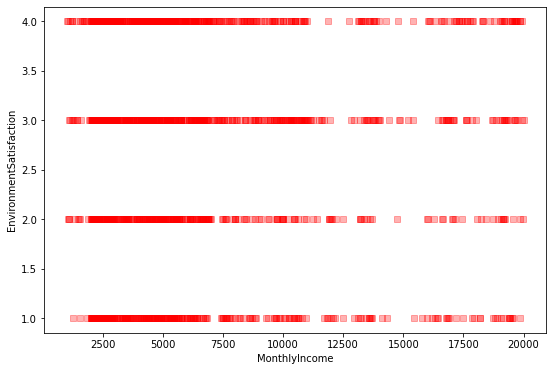

In [48]:
plt.figure(figsize=(9, 6))

plt.scatter(df_ES.MonthlyIncome, df_ES.EnvironmentSatisfaction, color='red', marker='s', alpha=0.3)

plt.xlabel('MonthlyIncome')
plt.ylabel('EnvironmentSatisfaction')
plt.show()

#### *Employees with Attrition attribute stating 'No'*

In [51]:
df_ES_Attr = data[['EnvironmentSatisfaction', 'MonthlyIncome', 'Attrition']]
df_ES_NO = df_ES_Attr[df_ES_Attr['Attrition'] == 'No']
df_ES_NO.groupby(['EnvironmentSatisfaction']).median()

,MonthlyIncome
EnvironmentSatisfaction,
1,5360.0
2,5044.5
3,5228.0
4,5139.0


In [49]:
r = np.corrcoef(df_ES_NO.MonthlyIncome, df_ES_NO.EnvironmentSatisfaction) # находим коэффициент корреляции
r[0,1] 
r[0,1]**2
if r[0,1] >=0.5:
    print(r, '\n', 'коэффициент корреляции ', round(r[0,1],3), 'высокий, что говорит о наличии сильной связи', '\n', round(r[0,1]**2,3))
if (r[0,1] > 0.1 and r[0,1]<0.5):
    print(r, '\n', 'коэффициент корреляции ', round(r[0,1],3), 'низкий, что говорит о слабой связи', '\n', round(r[0,1]**2,3))
if r[0,1] <= 0:
    print(r, '\n', 'коэффициент корреляции ', round(r[0,1],3),  'связи нет', '\n', round(r[0,1]**2,3))

[[ 1.         -0.01294729]
 [-0.01294729  1.        ]] 
 коэффициент корреляции  -0.013 связи нет 
 0.0


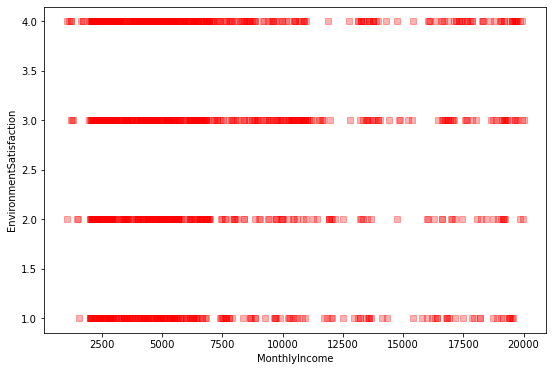

In [50]:
plt.figure(figsize=(9, 6))

plt.scatter(df_ES_NO.MonthlyIncome, df_ES_NO.EnvironmentSatisfaction, color='red', marker='s', alpha=0.3)

plt.xlabel('MonthlyIncome')
plt.ylabel('EnvironmentSatisfaction')
plt.show()

### *Employees with Attrition attribute stating 'Yes'*

In [51]:
df_ES_YES = df_ES_Attr[df_ES_Attr['Attrition'] == 'Yes']
df_ES_YES.groupby(['EnvironmentSatisfaction']).median()

,MonthlyIncome
EnvironmentSatisfaction,
1,3838.5
2,4171.0
3,2751.0
4,2888.5


In [52]:
r = np.corrcoef(df_ES_YES.MonthlyIncome, df_ES_YES.EnvironmentSatisfaction) # находим коэффициент корреляции
r[0,1] 
r[0,1]**2
if r[0,1] >=0.5:
    print(r, '\n', 'коэффициент корреляции ', round(r[0,1],3), 'высокий, что говорит о наличии сильной связи', '\n', round(r[0,1]**2,3))
if (r[0,1] > 0.1 and r[0,1]<0.5):
    print(r, '\n', 'коэффициент корреляции ', round(r[0,1],3), 'низкий, что говорит о слабой связи', '\n', round(r[0,1]**2,3))
if r[0,1] <= 0:
    print(r, '\n', 'коэффициент корреляции ', round(r[0,1],3),  'связи нет', '\n', round(r[0,1]**2,3))

[[ 1.        -0.0894569]
 [-0.0894569  1.       ]] 
 коэффициент корреляции  -0.089 связи нет 
 0.008


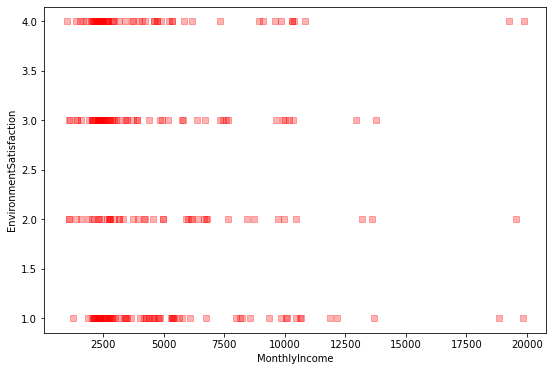

In [53]:
plt.figure(figsize=(9, 6))

plt.scatter(df_ES_YES.MonthlyIncome, df_ES_YES.EnvironmentSatisfaction, color='red', marker='s', alpha=0.3)

plt.xlabel('MonthlyIncome')
plt.ylabel('EnvironmentSatisfaction')
plt.show()

### *Work-Life Balance* <a id="WLB"></a>

In [54]:
df_wlb = data.loc[data['Attrition'] == 'No']
df_wlb.WorkLifeBalance.value_counts()

3    766
2    286
4    126
1     55
Name: WorkLifeBalance, dtype: int64

>>> Большинство действующих сотрудников достаточно высоко оценивает качество соотношения Работа-Жизнь - на уровне 'Better'

In [55]:
df_wlb = data.loc[data['Attrition'] == 'Yes']
df_wlb.WorkLifeBalance.value_counts()

3    127
2     58
4     27
1     25
Name: WorkLifeBalance, dtype: int64

>>> Аналогичная картина и по ушедшим сотрудникам - соотношение Работа-Жизнь находилось на уровне 'Better'

### *Рассматривается корреляция между Work-Life Balance & Job Level*<a id="WLBJL"></a>

In [52]:
#считаем кол-во сотрудников по уровням JobLevel, только из тех, кто уже не работает
jl1 = sum((df_agecon['JobLevel']==1) & (df_agecon['Attrition']=='No')) 
jl2 = sum((df_agecon['JobLevel']==2) & (df_agecon['Attrition']=='No'))
jl3 = sum((df_agecon['JobLevel']==3) & (df_agecon['Attrition']=='No'))
jl4 = sum((df_agecon['JobLevel']==4) & (df_agecon['Attrition']=='No'))
a = [jl1, jl2, jl3, jl4]
a

[400, 482, 186, 101]

In [53]:
#считаем кол-во сотрудников по уровням WorkLifeBalance, только из тех, кто уже не работает
wlb1 = sum((df_agecon['WorkLifeBalance']==1) & (df_agecon['Attrition']=='No')) 
wlb2 = sum((df_agecon['WorkLifeBalance']==2) & (df_agecon['Attrition']=='No'))
wlb3 = sum((df_agecon['WorkLifeBalance']==3) & (df_agecon['Attrition']=='No'))
wlb4 = sum((df_agecon['WorkLifeBalance']==4) & (df_agecon['Attrition']=='No'))
b = [wlb1, wlb2, wlb3, wlb4]
b

[55, 286, 766, 126]

In [54]:
r = np.corrcoef(b, a) # находим коэффициент корреляции
r[0,1] 
r[0,1]**2
if r[0,1] >=0.5:
    print(r, '\n', 'коэффициент корреляции ', round(r[0,1],3), 'высокий, что говорит о наличии сильной связи', '\n', round(r[0,1]**2,3))
if (r[0,1] > 0.1 and r[0,1]<0.5):
    print(r, '\n', 'коэффициент корреляции ', round(r[0,1],3), 'низкий, что говорит о слабой связи', '\n', round(r[0,1]**2,3))
if r[0,1] <= 0:
    print(r, '\n', 'коэффициент корреляции ', round(r[0,1],3),  'связи нет', '\n', round(r[0,1]**2,3))

[[ 1.         -0.26436775]
 [-0.26436775  1.        ]] 
 коэффициент корреляции  -0.264 связи нет 
 0.07


>>> Ниже можно увидеть как оценивают WorkLifeBalance сотрудники уровня JobLevel = 1

In [55]:
ab=df_agecon.loc[df_agecon['JobLevel']==1].WorkLifeBalance.value_counts()
ab

3    323
2    135
4     50
1     35
Name: WorkLifeBalance, dtype: int64

>>> Ниже можно увидеть как оценивают WorkLifeBalance сотрудники уровня JobLevel = 5

In [56]:
ab=df_agecon.loc[df_agecon['JobLevel']==5].WorkLifeBalance.value_counts()
ab

3    45
2    16
4     7
1     1
Name: WorkLifeBalance, dtype: int64

>>> Обе группы распределяют свои голоса примерно в тех же пропорциях. 

>>> Чтобы увидеть распределение между градациями Work-Life Balance всех пяти уровней Job Level в одной форме, ниже приведена сводная таблица (для действующих сотрудников компании)

In [57]:
pivot2 = pd.pivot_table(df_agecon_w, values='EmployeeCount', index=['JobLevel'], columns=['WorkLifeBalance'], aggfunc=np.sum)
pivot_renamed2 = pivot2.rename({1: 'very low', 2: 'low', 3:'medium', 4: 'high', 5:'very high'}, axis = 'index')
pivot_renamed3 = pivot_renamed2.rename({1: 'bad', 2: 'good', 3:'better', 4: 'best'}, axis = 'columns')
pivot_renamed3.fillna(0)

WorkLifeBalance,bad,good,better,best
JobLevel,,,,
very low,18,103,248,31
low,22,104,301,55
medium,10,37,117,22
high,4,26,60,11
very high,1,16,40,7


>>> Чтобы увидеть распределение между градациями Work-Life Balance всех пяти уровней Job Level в одной форме, ниже приведена сводная таблица (для покинувших команию сотрудников)

In [58]:
pivot2 = pd.pivot_table(df_agecon_nw, values='EmployeeCount', index=['JobLevel'], columns=['WorkLifeBalance'], aggfunc=np.sum)
pivot_renamed2 = pivot2.rename({1: 'very low', 2: 'low', 3:'medium', 4: 'high', 5:'very high'}, axis = 'index')
pivot_renamed3 = pivot_renamed2.rename({1: 'bad', 2: 'good', 3:'better', 4: 'best'}, axis = 'columns')
pivot_renamed3.fillna(0)

WorkLifeBalance,bad,good,better,best
JobLevel,,,,
very low,17.0,32.0,75.0,19.0
low,5.0,14.0,28.0,5.0
medium,2.0,9.0,18.0,3.0
high,1.0,3.0,1.0,0.0
very high,0.0,0.0,5.0,0.0


>>> из приведенной выше Сводной таблицы можно сделать вывод, что уходили в основном стажеры, специалисты, сотрудники, для которых эта компания была первым местом работы после университета. Также стоить учесть, что бОльшая часть сотрудников, покинувших компанию, входила в возрастную группу от 24 до 37 лет. 

## *Relationship Satisfaction vs Environment Satisfaction ranged by depts* <a id="RSES"></a>

### >>> Действующие сотрудники

In [72]:
#считаем кол-во сотрудников по уровням RelationshipSatisfaction, только из тех, кто еще работает
rs1 = sum(df_agecon_w['RelationshipSatisfaction']==1) 
rs2 = sum(df_agecon_w['RelationshipSatisfaction']==2) 
rs3 = sum(df_agecon_w['RelationshipSatisfaction']==3) 
rs4 = sum(df_agecon_w['RelationshipSatisfaction']==4) 
rs = [rs1, rs2, rs3, rs4]
rs

[219, 258, 388, 368]

In [73]:
#считаем кол-во сотрудников по уровням EnvironmentSatisfaction, только из тех, кто еще работает
es1 = sum(df_agecon_w['EnvironmentSatisfaction']==1)
es2 = sum(df_agecon_w['EnvironmentSatisfaction']==2)
es3 = sum(df_agecon_w['EnvironmentSatisfaction']==3)
es4 = sum(df_agecon_w['EnvironmentSatisfaction']==4)
es = [es1, es2, es3, es4]
es

[212, 244, 391, 386]

In [74]:
#df_agecon.columns.tolist()

In [75]:
r = np.corrcoef(rs, es) # находим коэффициент корреляции
r[0,1] 
r[0,1]**2
if r[0,1] >=0.5:
    print(r, '\n', 'коэффициент корреляции ', round(r[0,1],3), 'высокий, что говорит о наличии сильной связи', '\n', round(r[0,1]**2,3))
if (r[0,1] > 0.1 and r[0,1]<0.5):
    print(r, '\n', 'коэффициент корреляции ', round(r[0,1],3), 'низкий, что говорит о слабой связи', '\n', round(r[0,1]**2,3))
if r[0,1] <= 0:
    print(r, '\n', 'коэффициент корреляции ', round(r[0,1],3),  'связи нет', '\n', round(r[0,1]**2,3))

[[1.         0.99550204]
 [0.99550204 1.        ]] 
 коэффициент корреляции  0.996 высокий, что говорит о наличии сильной связи 
 0.991


### >>> Сотрудники, покинувшие компанию

In [77]:
#считаем кол-во сотрудников по уровням RelationshipSatisfaction, только из тех, кто еще работает
rsnw1 = sum(df_agecon_nw['RelationshipSatisfaction']==1) 
rsnw2 = sum(df_agecon_nw['RelationshipSatisfaction']==2) 
rsnw3 = sum(df_agecon_nw['RelationshipSatisfaction']==3) 
rsnw4 = sum(df_agecon_nw['RelationshipSatisfaction']==4) 
rsnw = [rsnw1, rsnw2, rsnw3, rsnw4]
rsnw
#считаем кол-во сотрудников по уровням EnvironmentSatisfaction, только из тех, кто еще работает
esnw1 = sum(df_agecon_nw['EnvironmentSatisfaction']==1)
esnw2 = sum(df_agecon_nw['EnvironmentSatisfaction']==2)
esnw3 = sum(df_agecon_nw['EnvironmentSatisfaction']==3)
esnw4 = sum(df_agecon_nw['EnvironmentSatisfaction']==4)
esnw = [esnw1, esnw2, esnw3, esnw4]
esnw
r = np.corrcoef(rsnw, esnw) # находим коэффициент корреляции
r[0,1] 
r[0,1]**2
if r[0,1] >=0.5:
    print(r, '\n', 'коэффициент корреляции ', round(r[0,1],3), 'высокий, что говорит о наличии сильной связи', '\n', round(r[0,1]**2,3))
if (r[0,1] > 0.1 and r[0,1]<0.5):
    print(r, '\n', 'коэффициент корреляции ', round(r[0,1],3), 'низкий, что говорит о слабой связи', '\n', round(r[0,1]**2,3))
if r[0,1] <= 0:
    print(r, '\n', 'коэффициент корреляции ', round(r[0,1],3),  'связи нет', '\n', round(r[0,1]**2,3))


[[1.         0.59629006]
 [0.59629006 1.        ]] 
 коэффициент корреляции  0.596 высокий, что говорит о наличии сильной связи 
 0.356


### *HR коррелиция между Relationship Satisfaction и Environment Satisfaction (по сотрудникам работающим в компании)*<a id="RSESHR"></a>

In [87]:
df_HR_w = data.loc[(data['Department']=='Human Resources') & (data['Attrition']=='No')]

In [96]:
#считаем кол-во сотрудников по уровням RelationshipSatisfaction, только из тех, кто еще работает
rshr1 = sum(df_HR_w['RelationshipSatisfaction']==1) 
rshr2 = sum(df_HR_w['RelationshipSatisfaction']==2) 
rshr3 = sum(df_HR_w['RelationshipSatisfaction']==3) 
rshr4 = sum(df_HR_w['RelationshipSatisfaction']==4) 
rshr = [rshr1, rshr2, rshr3, rshr4]

#считаем кол-во сотрудников по уровням EnvironmentSatisfaction, только из тех, кто еще работает
eshr1 = sum(df_HR_w['EnvironmentSatisfaction']==1)
eshr2 = sum(df_HR_w['EnvironmentSatisfaction']==2)
eshr3 = sum(df_HR_w['EnvironmentSatisfaction']==3)
eshr4 = sum(df_HR_w['EnvironmentSatisfaction']==4)
eshr = [eshr1, eshr2, eshr3, eshr4]

print('Список по Relationship Satisfaction ', rshr, 'Список по Environment Satisfaction ', eshr)

r = np.corrcoef(rshr, eshr) # находим коэффициент корреляции
r[0,1] 
r[0,1]**2
if r[0,1] >=0.5:
    print(r, '\n', 'коэффициент корреляции ', round(r[0,1],3), 'высокий, что говорит о наличии сильной связи', '\n', round(r[0,1]**2,3))
if (r[0,1] > 0.1 and r[0,1]<0.5):
    print(r, '\n', 'коэффициент корреляции ', round(r[0,1],3), 'низкий, что говорит о слабой связи', '\n', round(r[0,1]**2,3))
if r[0,1] <= 0:
    print(r, '\n', 'коэффициент корреляции ', round(r[0,1],3),  'связи нет', '\n', round(r[0,1]**2,3))

Список по Relationship Satisfaction  [7, 10, 18, 16] Список по Environment Satisfaction  [7, 9, 24, 11]
[[1.         0.82006067]
 [0.82006067 1.        ]] 
 коэффициент корреляции  0.82 высокий, что говорит о наличии сильной связи 
 0.672


### *HR: коррелиция между Relationship Satisfaction и Environment Satisfaction (по сотрудникам покинувшим компанию)*<a id="RSESHR1"></a>

In [98]:
df_HR_nw = data.loc[(data['Department']=='Human Resources') & (data['Attrition']=='Yes')]

In [99]:
#считаем кол-во сотрудников по уровням RelationshipSatisfaction, только из тех, кто еще работает
rshr1 = sum(df_HR_nw['RelationshipSatisfaction']==1) 
rshr2 = sum(df_HR_nw['RelationshipSatisfaction']==2) 
rshr3 = sum(df_HR_nw['RelationshipSatisfaction']==3) 
rshr4 = sum(df_HR_nw['RelationshipSatisfaction']==4) 
rshr = [rshr1, rshr2, rshr3, rshr4]

#считаем кол-во сотрудников по уровням EnvironmentSatisfaction, только из тех, кто еще работает
eshr1 = sum(df_HR_nw['EnvironmentSatisfaction']==1)
eshr2 = sum(df_HR_nw['EnvironmentSatisfaction']==2)
eshr3 = sum(df_HR_nw['EnvironmentSatisfaction']==3)
eshr4 = sum(df_HR_nw['EnvironmentSatisfaction']==4)
eshr = [eshr1, eshr2, eshr3, eshr4]

print('Список по Relationship Satisfaction ', rshr, 'Список по Environment Satisfaction ', eshr)

r = np.corrcoef(rshr, eshr) # находим коэффициент корреляции
r[0,1] 
r[0,1]**2
if r[0,1] >=0.5:
    print(r, '\n', 'коэффициент корреляции ', round(r[0,1],3), 'высокий, что говорит о наличии сильной связи', '\n', round(r[0,1]**2,3))
if (r[0,1] > 0.1 and r[0,1]<0.5):
    print(r, '\n', 'коэффициент корреляции ', round(r[0,1],3), 'низкий, что говорит о слабой связи', '\n', round(r[0,1]**2,3))
if r[0,1] <= 0:
    print(r, '\n', 'коэффициент корреляции ', round(r[0,1],3),  'связи нет', '\n', round(r[0,1]**2,3))

Список по Relationship Satisfaction  [1, 1, 6, 4] Список по Environment Satisfaction  [4, 3, 2, 3]
[[ 1.         -0.83333333]
 [-0.83333333  1.        ]] 
 коэффициент корреляции  -0.833 связи нет 
 0.694


>>>> Судя по полученным данным, сотрудники покинули компанию не из-за этих факторов

### *В какой возрастной категории основная текучка кадров?*<a id ="Attr"></a>

In [73]:
def plot_ages(data,abc):
    df_123 = data[data.Attrition == abc]
    list_numbers = list(df_123.groupby('Age').count().reset_index(drop=True)['EmployeeNumber'])
    list_years = np.unique(df_123.Age)
    plt.plot(list_years, list_numbers, 'green')
    plt.show()
    
    return 

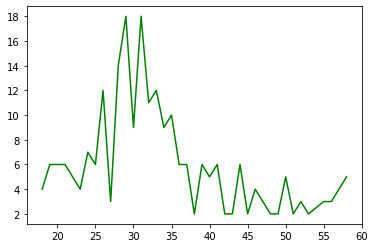

In [74]:
plot_ages(data,'Yes')

#### >>> Количество покинувших компанию сотрудников, распределенных по возрастным группам

In [69]:
df_jl2 = df_agecon.loc[df_agecon['Attrition'] == 'Yes']
df_jl2.groupby('Age_groups').sum()['EmployeeCount']

Age_groups
1: less and up to 23    31
2: 24 up to 30          69
3: 31 up to 37          72
4: 38 up to 43          23
5: 44 up to 50          24
6: 51 up to 59          18
Name: EmployeeCount, dtype: int64

#### >>> Количество покинувших компанию сотрудников, распределенных по возрастным группам, в % 

In [70]:
quited100 = ((df_agecon_nw.groupby(['Age_groups']).count()['Age'])/(df_agecon.groupby(['Age_groups']).count()['Age']))*100
round(quited100,2)

Age_groups
1: less and up to 23    43.66
2: 24 up to 30          21.90
3: 31 up to 37          15.58
4: 38 up to 43           8.36
5: 44 up to 50          11.76
6: 51 up to 59          13.04
7: equals 60              NaN
Name: Age, dtype: float64

#### >>> Количество покинувших компанию сотрудников, детализация по возрастам

In [71]:
df_jl = data.loc[data['Attrition'] == 'Yes']
df_jl.groupby('Age').sum()['EmployeeCount']

Age
18     4
19     6
20     6
21     6
22     5
23     4
24     7
25     6
26    12
27     3
28    14
29    18
30     9
31    18
32    11
33    12
34     9
35    10
36     6
37     6
38     2
39     6
40     5
41     6
42     2
43     2
44     6
45     2
46     4
47     3
48     2
49     2
50     5
51     2
52     3
53     2
55     3
56     3
58     5
Name: EmployeeCount, dtype: int64

### *Есть ли связь между Продвижением по службе, стажем в компании и сменой работы?* <a id="Attr2"></a>

In [59]:
def plot_ages(data,abc):
    df_123 = data[data.Attrition == abc]
    list_numbers = list(df_123.groupby('YearsSinceLastPromotion').count().reset_index(drop=True)['EmployeeNumber'])
    list_years = np.unique(df_123.YearsSinceLastPromotion)
    plt.plot(list_years, list_numbers, 'green')
    plt.show()
    
    return 

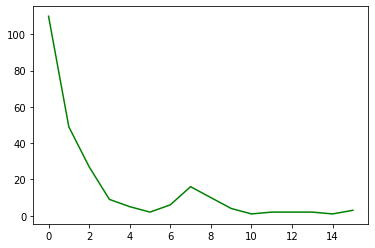

In [60]:
plot_ages(data,'Yes')

>>>> на этом графике показано кол-во ушедших с работы (ось Y), по отношению к периоду времени, прошедшему с момента повышения (ось Х) (если повышения не было, то тоже = 0)

In [61]:
pivot = pd.pivot_table(df_agecon, values='EmployeeCount', index=['YearsSinceLastPromotion'], columns=['Age_groups', 'Attrition'], aggfunc=np.sum)
pivot.fillna(0)

Age_groups              1: less and up to 23       2: 24 up to 30        \
Attrition                                 No   Yes             No   Yes   
YearsSinceLastPromotion                                                   
0                                       18.0  21.0          109.0  34.0   
1                                       11.0   9.0           79.0  16.0   
2                                       11.0   1.0           24.0  11.0   
3                                        0.0   0.0            7.0   2.0   
4                                        0.0   0.0            5.0   0.0   
5                                        0.0   0.0            5.0   1.0   
6                                        0.0   0.0            4.0   1.0   
7                                        0.0   0.0           10.0   4.0   
8                                        0.0   0.0            2.0   0.0   
9                                        0.0   0.0            0.0   0.0   
10                                       0.0   0.0            1.0   0.0   
11                                       0.0   0.0            0.0   0.0   
12                                       0.0   0.0            0.0   0.0   
13                                       0.0   0.0            0.0   0.0   
14                                       0.0   0.0            0.0   0.0   
15                                       0.0   0.0            0.0   0.0   

Age_groups              3: 31 up to 37       4: 38 up to 43        \
Attrition                           No   Yes             No   Yes   
YearsSinceLastPromotion                                             
0                                155.0  32.0           88.0  11.0   
1                                 92.0  10.0           56.0   6.0   
2                                 34.0   9.0           27.0   2.0   
3                                 13.0   4.0           13.0   0.0   
4                                 22.0   2.0            9.0   0.0   
5                                 18.0   0.0           12.0   0.0   
6                                 14.0   4.0            2.0   0.0   
7                                 19.0   6.0           15.0   1.0   
8                                 10.0   0.0            3.0   0.0   
9                                  5.0   2.0            4.0   0.0   
10                                 3.0   1.0            0.0   0.0   
11                                 3.0   1.0           13.0   1.0   
12                                 2.0   0.0            2.0   0.0   
13                                 0.0   0.0            4.0   1.0   
14                                 0.0   0.0            2.0   0.0   
15                                 0.0   1.0            2.0   1.0   

Age_groups              5: 44 up to 50      6: 51 up to 59      7: equals 60  
Attrition                           No  Yes             No  Yes           No  
YearsSinceLastPromotion                                                       
0                                 65.0  9.0           35.0  3.0          1.0  
1                                 37.0  5.0           32.0  3.0          1.0  
2                                 22.0  2.0           13.0  2.0          1.0  
3                                  7.0  2.0            3.0  1.0          0.0  
4                                  9.0  2.0           11.0  1.0          0.0  
5                                  7.0  0.0            1.0  1.0          0.0  
6                                  2.0  0.0            4.0  1.0          0.0  
7                                  8.0  2.0            8.0  3.0          0.0  
8                                  1.0  0.0            2.0  0.0          0.0  
9                                  3.0  1.0            1.0  1.0          0.0  
10                                 1.0  0.0            0.0  0.0          0.0  
11                                 3.0  0.0            2.0  0.0          1.0  
12                                 4.0  0.0            2.0  0.0          0.0 

In [62]:
def plot_ages(data,abc):
    df_123 = data[data.Attrition == abc]
    list_numbers = list(df_123.groupby('YearsAtCompany').count().reset_index(drop=True)['EmployeeNumber'])
    list_years = np.unique(df_123.YearsAtCompany)
    plt.plot(list_years, list_numbers, 'green')
    plt.show()
    
    return 

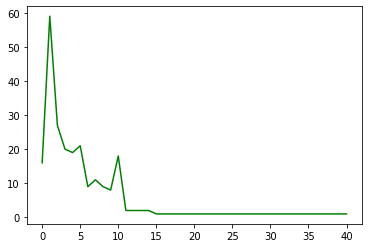

In [63]:
plot_ages(data,'Yes')

>>>> на этом графике показано отношение: стаж в годах (ось Х) к кол-ву сотрудников, покинувших компанию (ось Y) 

#### Есть ли корреляция между общим стажем в компании и повышением по ушедшим сотрудникам

In [68]:
aaaa=df_agecon_nw.groupby('Age_groups')['YearsSinceLastPromotion'].agg(['max', 'mean'])
bbbb=df_agecon_nw.groupby('Age_groups')['YearsAtCompany'].agg(['max','mean'])
cccc=df_agecon_nw.groupby('Age_groups')['EmployeeCount'].agg(['sum'])

In [69]:
aabb= aaaa.merge(bbbb, left_on='Age_groups', right_on='Age_groups', suffixes=('_SinceProm', '_YearsAtCom')).head()
aabb

,max_SinceProm,mean_SinceProm,max_YearsAtCom,mean_YearsAtCom
Age_groups,,,,
1: less and up to 23,2,0.354839,5,1.193548
2: 24 up to 30,7,1.202899,11,3.710145
3: 31 up to 37,15,2.333333,17,5.277778
4: 38 up to 43,15,2.434783,22,5.695652
5: 44 up to 50,14,2.500000,24,7.500000


In [70]:
aabb.merge(cccc, left_on='Age_groups', right_on='Age_groups', suffixes=('_SinceProm', '_YearsAtCom')).head()

,max_SinceProm,mean_SinceProm,max_YearsAtCom,mean_YearsAtCom,sum
Age_groups,,,,,
1: less and up to 23,2,0.354839,5,1.193548,31
2: 24 up to 30,7,1.202899,11,3.710145,69
3: 31 up to 37,15,2.333333,17,5.277778,72
4: 38 up to 43,15,2.434783,22,5.695652,23
5: 44 up to 50,14,2.500000,24,7.500000,24


In [71]:
pivot = pd.pivot_table(df_agecon, values='EmployeeCount', index=['YearsAtCompany'], columns=['YearsSinceLastPromotion'], aggfunc=np.sum)
pivot.fillna(0)

YearsSinceLastPromotion,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
YearsAtCompany,,,,,,,,,,,,,,,,
0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,158.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14.0,13.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,62.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,47.0,49.0,8.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,98.0,76.0,6.0,3.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,35.0,35.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,28.0,24.0,1.0,3.0,3.0,7.0,3.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,22.0,17.0,2.0,5.0,3.0,2.0,3.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### *Recommendations* <a id="Recom"></a>

In order to analise attrition reasons more precisly it would be good to have such data as: 
- cause for attrition (retirement, voluntary termination, resignation, stuff reduction, etc.); 
- date/time of attrition (to search seasonality whether it takes place, to find out external reasons that might affect the attrition)